In [1]:
import os, sys, time
import numpy as np
import matplotlib.pyplot as plt
import pickle
import random

sys.path.append('../')
sys.path.append('../Lib')
sys.path.append('../Protocols')
import mod_protocols
sys.path.append('../Models')
from br1977 import BR1977
from ord2011JK_v1 import ORD2011
import model_response

C:\Anaconda3\envs\ml\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Anaconda3\envs\ml\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Anaconda3\envs\ml\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [2]:
def get_high_fitness(ga_result):
    best_individual = ga_result.generations[0][0]

    for i, gen in enumerate(ga_result.generations):
        best_in_gen = ga_result.get_high_fitness_individual(i)
        if best_in_gen.fitness > best_individual.fitness:            
            best_individual = best_in_gen

    return best_individual

In [3]:
steps_in_protocol = 4
step_types=['step', 'ramp']
step_duration_bounds=(5, 1000)
step_voltage_bounds=(-120, 60)
window=2
step_size=2

In [4]:
p_li = []

In [5]:
p1 = mod_protocols.VoltageClampStep(voltage=-80, duration=200)
p_li.append(p1)
p2 = mod_protocols.VoltageClampRamp(voltage_start=-50, voltage_end=30, duration=500) 
p_li.append(p2)
p3 = mod_protocols.VoltageClampRamp()
p3.set_to_random_step( voltage_bounds=step_voltage_bounds,    # -> (-120, 60)
                      duration_bounds=step_duration_bounds)
p_li.append(p2)
print(p1, p2)

|STEP: Voltage: -80, Duration: 200| |RAMP: Voltage Start: -50, Voltage End: 30, Duration: 500|


In [6]:
p = mod_protocols.VoltageClampProtocol(steps=p_li)
p.get_voltage_change_endpoints()

[200, 700, 1200]

In [7]:
p.steps[0]

|STEP: Voltage: -80, Duration: 200|

In [12]:
trial_conditions = "trial_steps_ramps_ORD2011_256_64_4_-120_60"
current = 'I_Na'
ga_result = pickle.load(open(f'ga_results/{trial_conditions}/ga_results_{current}_artefact_False', 'rb'))
best_individual = get_high_fitness(ga_result)
best_protocol = best_individual.protocol
best_fitness = best_individual.fitness
print(best_protocol)
print(best_fitness)

|RAMP: Voltage Start: -4.4875709764051335, Voltage End: -105.53890717341677, Duration: 409.5085636555528| | |STEP: Voltage: -32.03236134609155, Duration: 815.7569538588526| | |RAMP: Voltage Start: -11.894390154148919, Voltage End: -117.93692421201838, Duration: 290.60489511215104| | |RAMP: Voltage Start: -30.992266728823648, Voltage End: -106.86176392859885, Duration: 379.1965183774804|
0.9993746040859885


  Current  Contribution  Time Start  Time End
0    I_Na      0.999374      1516.0    1518.0
1   I_NaL      0.465158       108.0     110.0
2    I_to      0.206323      1224.0    1226.0
3   I_CaL      0.950534      1226.0    1228.0
4    I_Kr      0.128678      1286.0    1288.0
5    I_Ks      0.016865      1278.0    1280.0
6    I_K1      0.999853      1512.0    1514.0


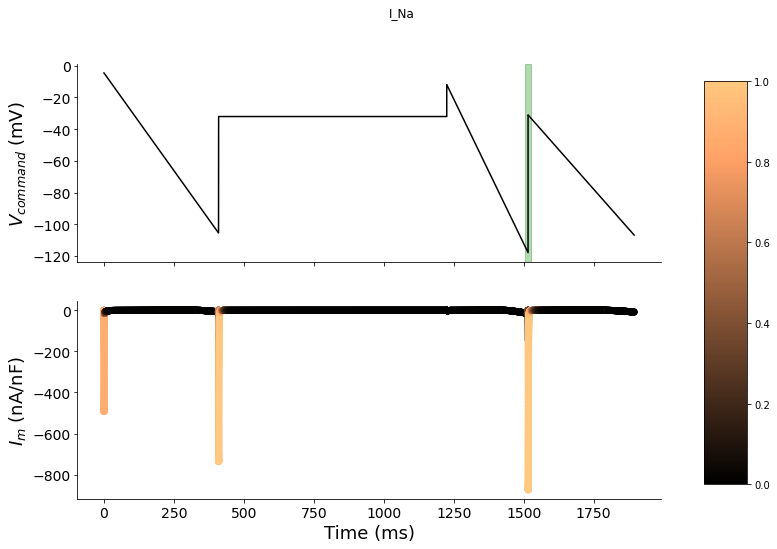

In [9]:
model = None
if 'ORD2011' in trial_conditions:
    model = ORD2011(best_protocol)
elif 'BR1977' in trial_conditions:
    model = BR1977(best_protocol)  
    
tr = model_response.get_model_response_JK(model, best_protocol, prestep=5000)

scale = 1
max_contributions = tr.current_response_info.get_max_current_contributions(
                time=tr.t,
                window=window/scale,
                step_size=step_size/scale)
print(max_contributions)
tr.plot_currents_contribution(current, window=window, step_size=step_size, is_shown=True, title=current,
        saved_to=f'./ga_results/{trial_conditions}/{current}.svg')

In [39]:
protocol_li = []
for i in [0, 1, 2, 3, 0, 1, 3]:
    protocol_li.append(best_protocol.steps[i])
protocol = mod_protocols.VoltageClampProtocol(steps=protocol_li)

There is no pre-step simulation.
  Current  Contribution  Time Start  Time End
0    I_Na      0.999371      1516.0    1518.0
1   I_NaL      0.654950       108.0     110.0
2    I_to      0.202449      1224.0    1226.0
3   I_CaL      0.948967      1226.0    1228.0
4    I_Kr      0.125431      1286.0    1288.0
5    I_Ks      0.016377      1278.0    1280.0
6    I_K1      0.999853      1512.0    1514.0


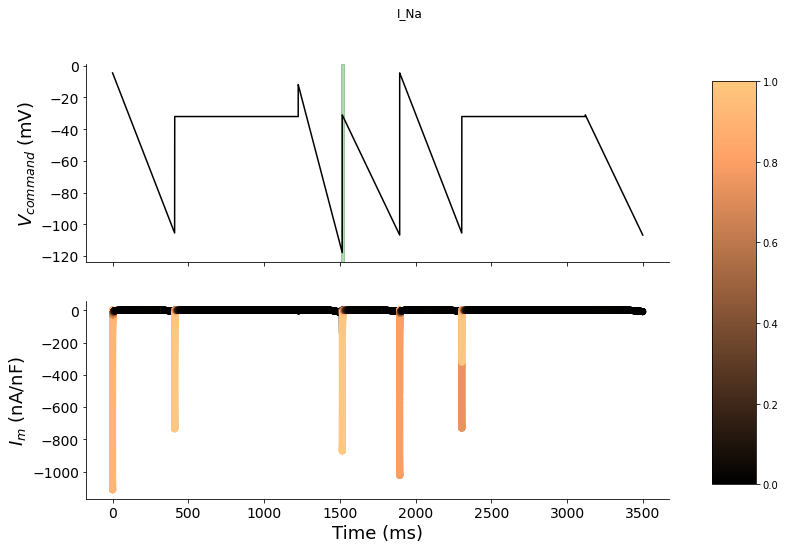

In [40]:
model = None
if 'ORD2011' in trial_conditions:
    model = ORD2011(protocol)
elif 'BR1977' in trial_conditions:
    model = BR1977(protocol)  
    
tr = model_response.get_model_response_JK(model, protocol)

scale = 1
max_contributions = tr.current_response_info.\
            get_max_current_contributions(
                time=tr.t,
                window=window/scale,
                step_size=step_size/scale)
print(max_contributions)
tr.plot_currents_contribution(current, window=window, step_size=step_size, is_shown=True, title=current,
        saved_to=f'./ga_results/{trial_conditions}/{current}.svg')